# Machine Learning Assignment 2 - Model Training Notebook
## BITS Virtual Lab Execution

This notebook implements all 6 classification models and calculates 6 evaluation metrics.

**Take a screenshot of the final results table for submission!**

## 1. Install Dependencies

In [1]:
# Install xgboost if not already installed
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost", "-q"])
print("xgboost ready")

xgboost ready


## 2. Import Required Libraries

In [2]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from utils.ml_utils import preprocess_data, initialize_models, calculate_all_metrics

warnings.filterwarnings('ignore')
print("All libraries imported successfully!")

All libraries imported successfully!


## 3. Configuration

In [3]:
# ========== CONFIGURATION ==========
CSV_PATH     = '../input/adult_income.csv'
TARGET_COLUMN = 'income'
RANDOM_STATE  = 42
TEST_SIZE     = 0.2
OUTPUT_DIR    = '../output'
# ====================================

os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory: {OUTPUT_DIR}")

Output directory: ../output


## 4. Load Dataset

In [4]:
print(f"Loading dataset from: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)
df.dropna(inplace=True)

print(f"\n{'='*60}")
print("DATASET INFORMATION")
print(f"{'='*60}")
print(f"Shape: {df.shape}")
print(f"Number of Features: {df.shape[1] - 1}")
print(f"Number of Instances: {df.shape[0]}")
print(f"\nMinimum 12 features: {'PASSED' if df.shape[1] >= 13 else 'FAILED'}")
print(f"Minimum 500 instances: {'PASSED' if df.shape[0] >= 500 else 'FAILED'}")

print("\nFirst 5 rows:")
display(df.head())

print(f"\nTarget Variable Distribution:")
print(df[TARGET_COLUMN].value_counts())

Loading dataset from: ../input/adult_income.csv

DATASET INFORMATION
Shape: (30162, 15)
Number of Features: 14
Number of Instances: 30162

Minimum 12 features: PASSED
Minimum 500 instances: PASSED

First 5 rows:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



Target Variable Distribution:
income
<=50K    22654
>50K      7508
Name: count, dtype: int64


## 5. Data Preprocessing

In [5]:
print("Starting data preprocessing...\n")

X, y, label_encoder = preprocess_data(df, TARGET_COLUMN)

print(f"Preprocessing complete!")
print(f"Final feature matrix shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Target classes: {label_encoder.classes_}")

Starting data preprocessing...

Preprocessing complete!
Final feature matrix shape: (30162, 14)
Number of classes: 2
Target classes: ['<=50K' '>50K']


## 6. Train-Test Split & Feature Scaling

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(f"Training set : {X_train_scaled.shape}")
print(f"Test set     : {X_test_scaled.shape}")
print(f"Class balance (train): {np.bincount(y_train)}")

Training set : (24129, 14)
Test set     : (6033, 14)
Class balance (train): [18123  6006]


## 7. Initialize All 6 Models

In [7]:
print("Initializing all 6 classification models...\n")

models = initialize_models(RANDOM_STATE)

print("Models initialized:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"   {i}. {model_name}")

Initializing all 6 classification models...

Models initialized:
   1. Logistic Regression
   2. Decision Tree
   3. K-Nearest Neighbors
   4. Naive Bayes
   5. Random Forest
   6. XGBoost


## 8. Train All Models & Calculate Metrics

In [8]:
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...", end=' ')
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

    metrics = calculate_all_metrics(y_test, y_pred, y_proba)
    results[model_name] = metrics
    print(f"Accuracy={metrics['Accuracy']:.4f}  AUC={metrics['AUC']:.4f}")

print("\nAll 6 models trained successfully!")

Training Logistic Regression... Accuracy=0.8175  AUC=0.8501
Training Decision Tree... Accuracy=0.8508  AUC=0.8855
Training K-Nearest Neighbors... Accuracy=0.8190  AUC=0.8498
Training Naive Bayes... Accuracy=0.7978  AUC=0.8498
Training Random Forest... Accuracy=0.8589  AUC=0.9136
Training XGBoost... Accuracy=0.8671  AUC=0.9243

All 6 models trained successfully!


## 9. Results Summary Table

**TAKE SCREENSHOT OF THIS TABLE FOR BITS LAB SUBMISSION!**

In [9]:
results_df = pd.DataFrame(results).T
results_df = results_df[['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']]
results_df = results_df.round(4)

best_model    = results_df['Accuracy'].idxmax()
best_accuracy = results_df['Accuracy'].max()

print("="*70)
print("MODEL COMPARISON RESULTS - 6 MODELS x 6 METRICS")
print("="*70)
display(results_df)
print(f"\nBest Model: {best_model} (Accuracy = {best_accuracy:.4f})")

MODEL COMPARISON RESULTS - 6 MODELS x 6 METRICS


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.8175,0.8501,0.8060,0.8175,0.8018,0.4613
Decision Tree,0.8508,0.8855,0.8446,0.8508,0.8451,0.5789
K-Nearest Neighbors,0.8190,0.8498,0.8133,0.8190,0.8154,0.4993
Naive Bayes,0.7978,0.8498,0.7830,0.7978,0.7697,0.3798
Random Forest,0.8589,0.9136,0.8534,0.8589,0.8526,0.6003
XGBoost,0.8671,0.9243,0.8624,0.8671,0.8624,0.6269



Best Model: XGBoost (Accuracy = 0.8671)


## 10. Save Results to CSV

In [10]:
csv_path = os.path.join(OUTPUT_DIR, 'model_comparison_results.csv')
results_df.to_csv(csv_path)
print(f"Results saved to: {csv_path}")

print("\nSaved Results:")
display(pd.read_csv(csv_path, index_col=0))

Results saved to: ../output\model_comparison_results.csv

Saved Results:


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.8175,0.8501,0.8060,0.8175,0.8018,0.4613
Decision Tree,0.8508,0.8855,0.8446,0.8508,0.8451,0.5789
K-Nearest Neighbors,0.8190,0.8498,0.8133,0.8190,0.8154,0.4993
Naive Bayes,0.7978,0.8498,0.7830,0.7978,0.7697,0.3798
Random Forest,0.8589,0.9136,0.8534,0.8589,0.8526,0.6003
XGBoost,0.8671,0.9243,0.8624,0.8671,0.8624,0.6269


## 11. Confusion Matrix Visualization

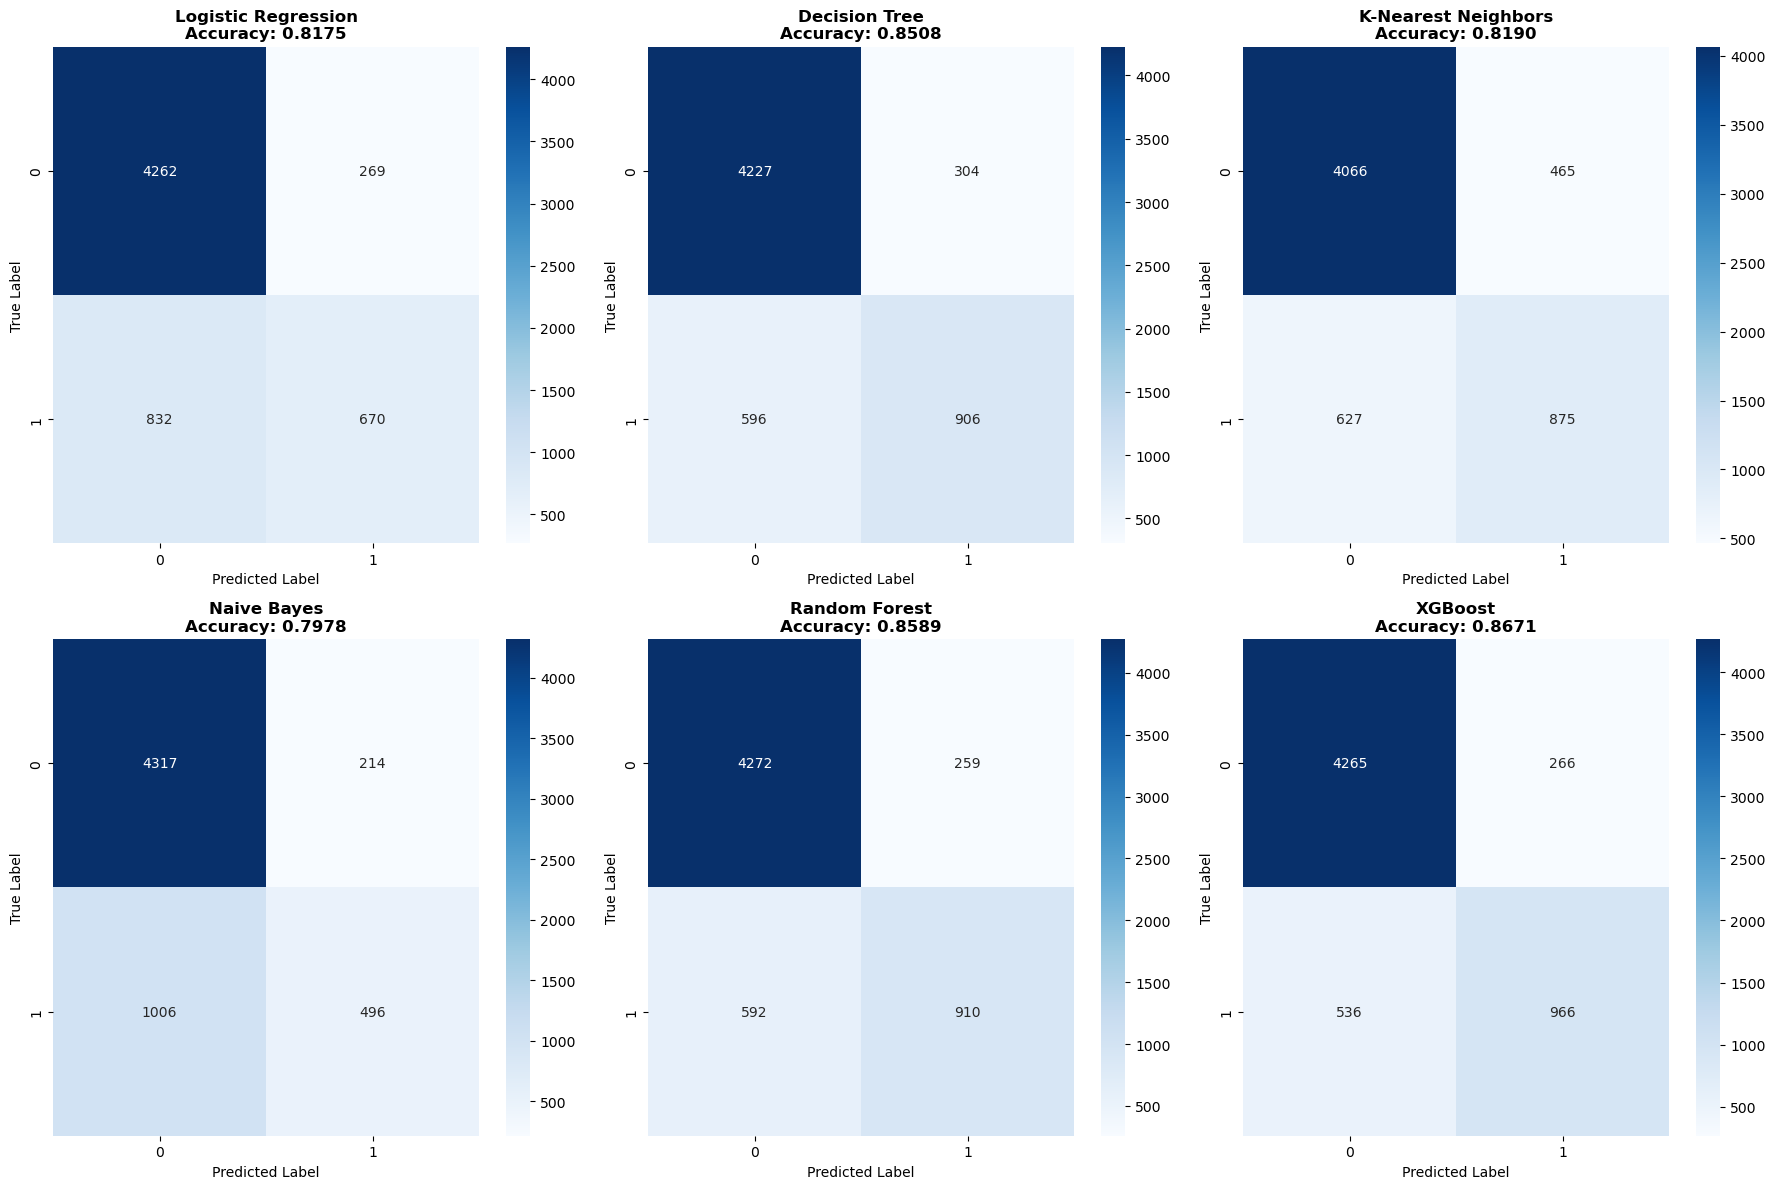

Confusion matrices saved to: ../output\confusion_matrices.png


In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(
        f'{model_name}\nAccuracy: {results[model_name]["Accuracy"]:.4f}',
        fontweight='bold'
    )
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
cm_path = os.path.join(OUTPUT_DIR, 'confusion_matrices.png')
plt.savefig(cm_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Confusion matrices saved to: {cm_path}")

## 12. Model Performance Comparison Chart

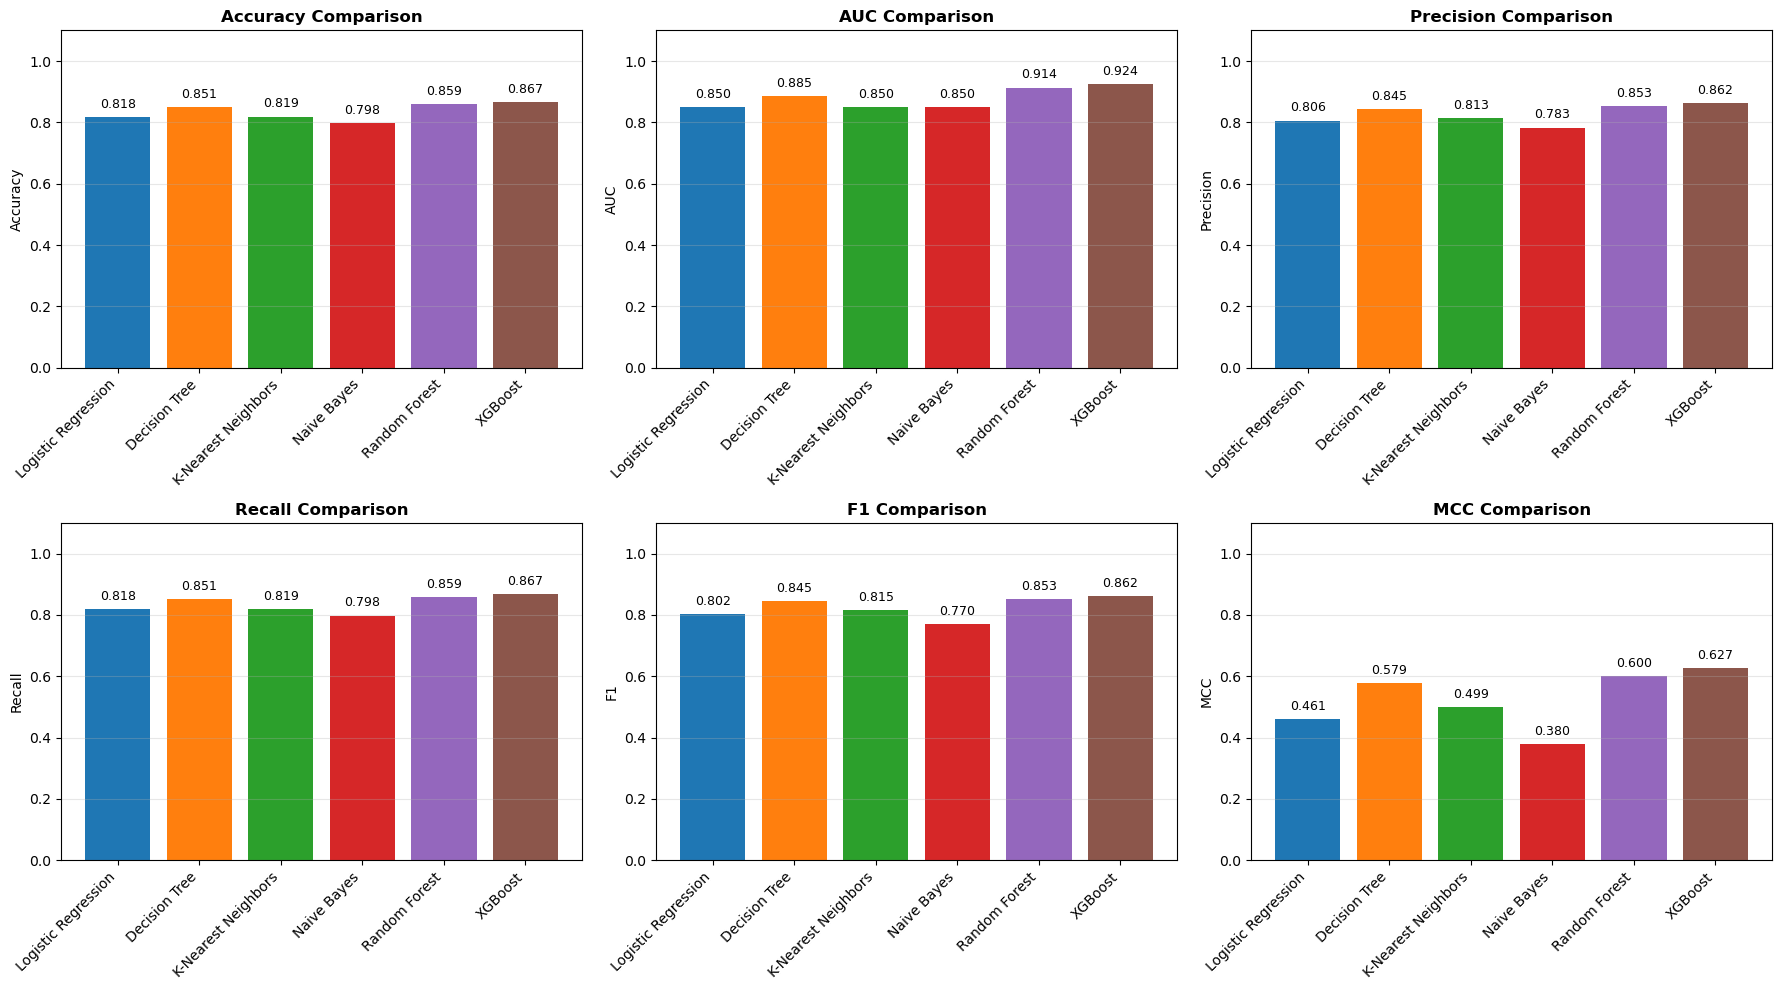

Metrics comparison chart saved to: ../output\metrics_comparison.png


In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics_list = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, metric in enumerate(metrics_list):
    metric_values = results_df[metric]
    axes[idx].bar(range(len(metric_values)), metric_values, color=colors)
    axes[idx].set_xticks(range(len(metric_values)))
    axes[idx].set_xticklabels(results_df.index, rotation=45, ha='right')
    axes[idx].set_title(f'{metric} Comparison', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0, 1.1])
    axes[idx].grid(axis='y', alpha=0.3)
    for i, v in enumerate(metric_values):
        axes[idx].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
mc_path = os.path.join(OUTPUT_DIR, 'metrics_comparison.png')
plt.savefig(mc_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Metrics comparison chart saved to: {mc_path}")

## 13. Summary and Conclusion

In [13]:
print("="*70)
print("ASSIGNMENT EXECUTION SUMMARY")
print("="*70)
print(f"\nDataset loaded: {df.shape[0]} instances, {df.shape[1]-1} features")
print(f"All 6 models trained successfully")
print(f"All 6 metrics calculated for each model")
print(f"Results saved to CSV")
print(f"Visualizations created")
print(f"\nBest performing model: {best_model}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print("\n" + "="*70)
print("NEXT STEPS:")
print("="*70)
print("1. Take screenshot of the results table (Cell 9)")
print("2. Copy results to README.md")
print("3. Write observations for each model")
print("4. Upload to GitHub")
print("5. Deploy Streamlit app")
print("6. Submit PDF with all links")
print("="*70)

ASSIGNMENT EXECUTION SUMMARY

Dataset loaded: 30162 instances, 14 features
All 6 models trained successfully
All 6 metrics calculated for each model
Results saved to CSV
Visualizations created

Best performing model: XGBoost
Best Accuracy: 0.8671

NEXT STEPS:
1. Take screenshot of the results table (Cell 9)
2. Copy results to README.md
3. Write observations for each model
4. Upload to GitHub
5. Deploy Streamlit app
6. Submit PDF with all links
